### 1.1 Libraries
Load libraries into notebook

In [2]:
import os                               # Operating system
import math                             # Mathematics
import numpy as np                      # Arrays
import pandas as pd                     # Dataframes
import matplotlib.pyplot as plt         # Graphs
from matplotlib import cm               # Colours
import scipy                            # Scientific computing
# import cvxpy as cp                      # Convex optimisation
from mpl_toolkits.mplot3d import Axes3D # 3D graphs

In [3]:
%matplotlib inline

### 1.2 Data
Get list of stock names

In [4]:
stocks = [stock.split('.')[0] for stock in sorted(os.listdir(r'C:\Users\HP\Desktop\PGDBA IIM-ISI-IIT\SEM - 2 KGP\Subjects\MOM\Project\nse50'))]

In [5]:
stocks

['ADANIPORTS',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJAJFINSV',
 'BAJFINANCE',
 'BHARTIARTL',
 'BPCL',
 'BRITANNIA',
 'CIPLA',
 'COALINDIA',
 'DIVISLAB',
 'DRREDDY',
 'EICHERMOT',
 'GRASIM',
 'HCLTECH',
 'HDFC',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'ICICIBANK',
 'INDUSINDBK',
 'INFY',
 'IOC',
 'ITC',
 'JSWSTEEL',
 'KOTAKBANK',
 'LT',
 'M&M',
 'MARUTI',
 'NESTLEIND',
 'NTPC',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBILIFE',
 'SBIN',
 'SHREECEM',
 'SUNPHARMA',
 'TATACONSUM',
 'TATAMOTORS',
 'TATASTEEL',
 'TCS',
 'TECHM',
 'TITAN',
 'ULTRACEMCO',
 'UPL',
 'WIPRO']

### 1.3 Create a dataframe containing dates

In [6]:
dates = pd.date_range('2015-01-01', '2020-01-01') # Create date range from 01-01-2000 to 31-03-2020
data = pd.DataFrame({'Time': dates})              # Add dates to dataframe with column name

### 1.4 Append the adjusted closing price of each stock to a dataframe keyed on date

In [7]:
for stock in stocks:                                                          # For each stock
    prices = pd.read_csv(                                                     # Read prices into dataframe
        r'C:\Users\HP\Desktop\PGDBA IIM-ISI-IIT\SEM - 2 KGP\Subjects\MOM\Project\nse50\\' + stock + '.csv', # Get filename
        usecols=['Date', 'Close']                                         # Select date and adjusted closing price
    )
    prices['Date'] = pd.to_datetime(prices['Date'])                           # Typecast dates to datetimes
    prices.rename(                                                            # Rename columns
        columns={"Date": "Time", "Close": stock},
        inplace=True
    )
    data = pd.merge(                                                          # Add stock to master dataframe
        data,                                                                 # Initially contains dates only
        prices,                                                               # Insert stock prices
        how='left',                                                           # Left outer join
        on=['Time'],                                                          # Key on the time column
        sort=False
    )

In [9]:
# Search Data for NaNs
data

,Time,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,BPCL,BRITANNIA,...,SUNPHARMA,TATACONSUM,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UPL,WIPRO
0,2015-01-01,319.55,749.15,503.05,2452.15,1286.60,3499.70,362.90,654.20,1831.50,...,822.20,150.70,498.45,404.45,2545.55,2594.55,379.80,2662.50,341.60,552.40
1,2015-01-02,319.35,775.05,514.30,2451.75,1275.65,3443.75,365.05,644.40,1878.55,...,826.25,152.50,511.80,410.75,2579.45,2607.25,382.80,2742.10,352.25,557.30
2,2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,323.80,775.00,517.55,2460.70,1258.70,3434.75,356.95,645.65,1879.85,...,826.75,152.95,523.80,416.70,2540.25,2563.75,385.90,2747.70,345.70,558.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1823,2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1824,2019-12-30,365.95,1802.30,754.10,3251.95,9439.20,4243.30,460.50,493.05,3047.35,...,430.15,321.40,183.70,474.75,2183.20,782.70,1193.75,4051.95,589.35,248.95
1825,2019-12-31,366.00,1784.95,754.10,3185.00,9393.35,4234.75,455.80,491.55,3027.80,...,432.55,321.35,185.15,472.05,2161.70,762.30,1187.95,4046.05,584.50,245.80


In [10]:
# Display NULL count
data.isnull().sum()

Time             0
ADANIPORTS     593
ASIANPAINT     593
AXISBANK       593
BAJAJ-AUTO     593
BAJAJFINSV     593
BAJFINANCE     593
BHARTIARTL     593
BPCL           593
BRITANNIA      593
CIPLA          593
COALINDIA      593
DIVISLAB       593
DRREDDY        593
EICHERMOT      593
GRASIM         593
HCLTECH        593
HDFC           593
HDFCBANK       593
HDFCLIFE      1306
HEROMOTOCO     593
HINDALCO       593
HINDUNILVR     593
ICICIBANK      593
INDUSINDBK     593
INFY           593
IOC            593
ITC            593
JSWSTEEL       593
KOTAKBANK      593
LT             593
M&M            593
MARUTI         593
NESTLEIND      593
NTPC           593
ONGC           593
POWERGRID      593
RELIANCE       593
SBILIFE       1274
SBIN           593
SHREECEM       593
SUNPHARMA      593
TATACONSUM     593
TATAMOTORS     593
TATASTEEL      593
TCS            593
TECHM          593
TITAN          593
ULTRACEMCO     593
UPL            593
WIPRO          593
dtype: int64

In [11]:
# Remove stocks with Null count more than 593
data = data.loc[:,data.isnull().sum(axis = 0) <= 593].copy()

In [12]:
data = data.dropna(axis=0, how='any') # Remove empty rows

In [14]:
# Check data for NaNs now...
data

,Time,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,BPCL,BRITANNIA,...,SUNPHARMA,TATACONSUM,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UPL,WIPRO
0,2015-01-01,319.55,749.15,503.05,2452.15,1286.60,3499.70,362.90,654.20,1831.50,...,822.20,150.70,498.45,404.45,2545.55,2594.55,379.80,2662.50,341.60,552.40
1,2015-01-02,319.35,775.05,514.30,2451.75,1275.65,3443.75,365.05,644.40,1878.55,...,826.25,152.50,511.80,410.75,2579.45,2607.25,382.80,2742.10,352.25,557.30
4,2015-01-05,323.80,775.00,517.55,2460.70,1258.70,3434.75,356.95,645.65,1879.85,...,826.75,152.95,523.80,416.70,2540.25,2563.75,385.90,2747.70,345.70,558.30
5,2015-01-06,321.85,756.50,499.05,2441.50,1229.60,3425.85,354.15,639.15,1881.90,...,808.55,148.15,501.40,396.50,2446.60,2536.25,372.70,2670.60,328.95,545.25
6,2015-01-07,321.10,771.70,498.65,2447.20,1228.55,3495.60,355.00,644.95,1995.75,...,809.80,148.45,493.85,388.90,2417.70,2524.40,374.60,2660.05,323.05,541.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,2019-12-24,368.60,1803.45,740.65,3226.75,9294.85,4139.50,457.15,477.80,3091.05,...,429.80,315.35,175.50,463.00,2215.60,772.05,1204.10,4097.35,569.15,252.25
1820,2019-12-26,363.65,1809.60,736.50,3230.05,9350.10,4187.10,447.55,477.20,3062.30,...,422.15,312.90,174.60,467.90,2201.95,770.40,1192.50,4062.75,569.45,250.30
1821,2019-12-27,363.70,1812.25,760.15,3241.95,9443.15,4252.65,455.10,490.95,3042.10,...,426.00,318.45,176.15,469.50,2198.50,780.20,1191.45,4055.60,580.25,247.55
1824,2019-12-30,365.95,1802.30,754.10,3251.95,9439.20,4243.30,460.50,493.05,3047.35,...,430.15,321.40,183.70,474.75,2183.20,782.70,1193.75,4051.95,589.35,248.95


In [16]:
# Display NULL count - final check for null count...
data.isnull().sum().sum()

0

# Approach 1: Monte carlo Simulation

In [17]:
data_2 = data.copy()
data_2 = data_2.drop(['Time'],axis=1)

In [18]:
from finquant.portfolio import build_portfolio
pf = build_portfolio(data = data_2)

In [19]:
pf.properties()

----------------------------------------------------------------------
Stocks: ADANIPORTS, ASIANPAINT, AXISBANK, BAJAJ-AUTO, BAJAJFINSV, BAJFINANCE, BHARTIARTL, BPCL, BRITANNIA, CIPLA, COALINDIA, DIVISLAB, DRREDDY, EICHERMOT, GRASIM, HCLTECH, HDFC, HDFCBANK, HEROMOTOCO, HINDALCO, HINDUNILVR, ICICIBANK, INDUSINDBK, INFY, IOC, ITC, JSWSTEEL, KOTAKBANK, LT, M&M, MARUTI, NESTLEIND, NTPC, ONGC, POWERGRID, RELIANCE, SBIN, SHREECEM, SUNPHARMA, TATACONSUM, TATAMOTORS, TATASTEEL, TCS, TECHM, TITAN, ULTRACEMCO, UPL, WIPRO
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.078
Portfolio Volatility: 0.143
Portfolio Sharpe Ratio: 0.512

Skewness:
   ADANIPORTS  ASIANPAINT  AXISBANK  BAJAJ-AUTO  BAJAJFINSV  BAJFINANCE  \
0   -0.621675    0.557542  0.750293   -0.231744     0.27235    1.134952   

   BHARTIARTL      BPCL  BRITANNIA    CIPLA  ...  SUNPHARMA  TATACONSUM  \
0    1.153955  0.351799   1.117409  0.07517  ...   0.389425    0.490589   

   TATAMOTORS  TATASTEEL     

C:\Users\HP\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


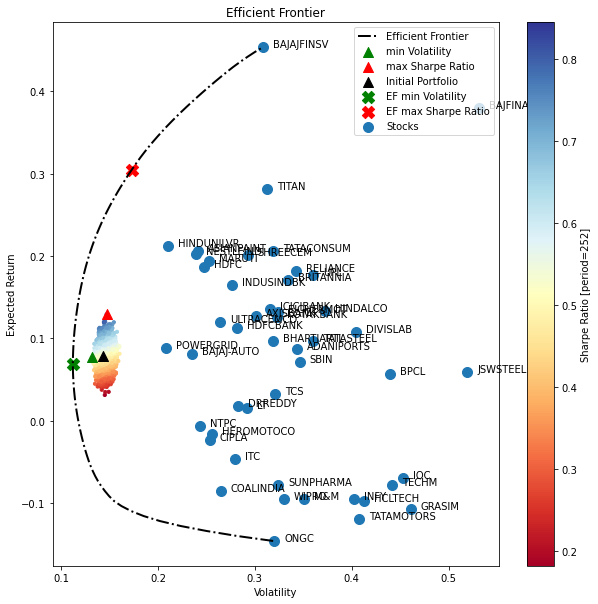

In [20]:
plt.figure(figsize=(10,10))

# Run MC for 20000 iterations-
opt_w, opt_res = pf.mc_optimisation(num_trials=20000)
# plots the results of the Monte Carlo optimisation
pf.mc_plot_results()
# plots the Efficient Frontier
pf.ef_plot_efrontier()
# plots optimal portfolios based on Efficient Frontier
pf.ef.plot_optimal_portfolios()
# plots individual plots of the portfolio
pf.plot_stocks()

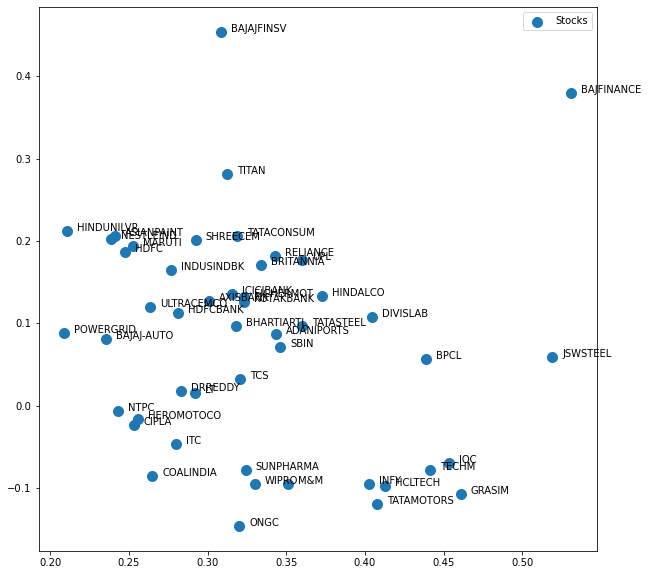

In [21]:
plt.figure(figsize=(10,10))

pf.plot_stocks()

# Approach 2: Optimum using constrained optimisation (SLSQP)
SLSQP - Sequential Least Squares Programming

##  2.1 Minimise Portfolio Volatility for a Given Target Return Constraint

In [22]:
pf = build_portfolio(data = data_2)

In [23]:
# ef_efficient_return() method - Finds the portfolio with the minimum Volatility for a given target return.
df = pf.ef_efficient_return(0.08)  # 8% return constraint
df=df.reset_index()
df=df.rename({'index':'Name'}, axis=1)

In [24]:
df.round(4).sort_values('Allocation', ascending = False)

,Name,Allocation
34,POWERGRID,0.1480
20,HINDUNILVR,0.1130
31,NESTLEIND,0.1052
12,DRREDDY,0.0682
42,TCS,0.0646
32,NTPC,0.0529
47,WIPRO,0.0529
10,COALINDIA,0.0462
17,HDFCBANK,0.0426
25,ITC,0.0420


In [25]:
pf = build_portfolio(data = data_2)

In [26]:
df = pf.ef_efficient_return(0.1)  # 10% returns

In [37]:
df.reset_index().rename({'index':'Name'}, axis=1).sort_values('Allocation',ascending = False).round(3)

,Name,Name,Allocation
34,34,POWERGRID,0.153
20,20,HINDUNILVR,0.124
31,31,NESTLEIND,0.111
12,12,DRREDDY,0.067
42,42,TCS,0.065
47,47,WIPRO,0.048
32,32,NTPC,0.046
17,17,HDFCBANK,0.042
1,1,ASIANPAINT,0.037
10,10,COALINDIA,0.037


In [39]:
build_portfolio(data=data_2, pf_allocation=df).properties()

----------------------------------------------------------------------
Stocks: ADANIPORTS, ASIANPAINT, AXISBANK, BAJAJ-AUTO, BAJAJFINSV, BAJFINANCE, BHARTIARTL, BPCL, BRITANNIA, CIPLA, COALINDIA, DIVISLAB, DRREDDY, EICHERMOT, GRASIM, HCLTECH, HDFC, HDFCBANK, HEROMOTOCO, HINDALCO, HINDUNILVR, ICICIBANK, INDUSINDBK, INFY, IOC, ITC, JSWSTEEL, KOTAKBANK, LT, M&M, MARUTI, NESTLEIND, NTPC, ONGC, POWERGRID, RELIANCE, SBIN, SHREECEM, SUNPHARMA, TATACONSUM, TATAMOTORS, TATASTEEL, TCS, TECHM, TITAN, ULTRACEMCO, UPL, WIPRO
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.100
Portfolio Volatility: 0.113
Portfolio Sharpe Ratio: 0.840

Skewness:
   ADANIPORTS  ASIANPAINT  AXISBANK  BAJAJ-AUTO  BAJAJFINSV  BAJFINANCE  \
0   -0.621675    0.557542  0.750293   -0.231744     0.27235    1.134952   

   BHARTIARTL      BPCL  BRITANNIA    CIPLA  ...  SUNPHARMA  TATACONSUM  \
0    1.153955  0.351799   1.117409  0.07517  ...   0.389425    0.490589   

   TATAMOTORS  TATASTEEL     

## 2.2 Maximise Portfolio Sharpe Ratio for a given Target Volatility Constraint

In [46]:
pf = build_portfolio(data = data_2)

In [47]:
# Finds the portfolio with the maximum Sharpe Ratio for a given target Volatility.

df = pf.ef_efficient_volatility(0.1)  # Target Volatility 10%
df=df.reset_index()
df=df.rename({'index':'Name'}, axis=1)

In [48]:
df.round(2).sort_values('Allocation', ascending = False)

,Name,Allocation
34,POWERGRID,0.14
20,HINDUNILVR,0.10
31,NESTLEIND,0.10
12,DRREDDY,0.07
47,WIPRO,0.06
42,TCS,0.06
32,NTPC,0.06
25,ITC,0.05
10,COALINDIA,0.05
3,BAJAJ-AUTO,0.04


In [49]:
build_portfolio(data=data_2, pf_allocation=df).properties()

----------------------------------------------------------------------
Stocks: ADANIPORTS, ASIANPAINT, AXISBANK, BAJAJ-AUTO, BAJAJFINSV, BAJFINANCE, BHARTIARTL, BPCL, BRITANNIA, CIPLA, COALINDIA, DIVISLAB, DRREDDY, EICHERMOT, GRASIM, HCLTECH, HDFC, HDFCBANK, HEROMOTOCO, HINDALCO, HINDUNILVR, ICICIBANK, INDUSINDBK, INFY, IOC, ITC, JSWSTEEL, KOTAKBANK, LT, M&M, MARUTI, NESTLEIND, NTPC, ONGC, POWERGRID, RELIANCE, SBIN, SHREECEM, SUNPHARMA, TATACONSUM, TATAMOTORS, TATASTEEL, TCS, TECHM, TITAN, ULTRACEMCO, UPL, WIPRO
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.069
Portfolio Volatility: 0.112
Portfolio Sharpe Ratio: 0.568

Skewness:
   ADANIPORTS  ASIANPAINT  AXISBANK  BAJAJ-AUTO  BAJAJFINSV  BAJFINANCE  \
0   -0.621675    0.557542  0.750293   -0.231744     0.27235    1.134952   

   BHARTIARTL      BPCL  BRITANNIA    CIPLA  ...  SUNPHARMA  TATACONSUM  \
0    1.153955  0.351799   1.117409  0.07517  ...   0.389425    0.490589   

   TATAMOTORS  TATASTEEL     

## 2.3 Maximise Sharpe Ratio (Unconstrained)
Finds the portfolio with the maximum Sharpe Ratio, also called the tangency portfolio.

In [51]:
pf = build_portfolio(data = data_2)

In [52]:
# ef_maximum_sharpe_ratio() method - Finds the portfolio with the maximum Sharpe Ratio, also called the tangency portfolio.
df = pf.ef_maximum_sharpe_ratio()
df=df.reset_index()
df=df.rename({'index':'Name'}, axis=1)

In [53]:
df.round(2).sort_values('Allocation', ascending = False)

,Name,Allocation
4,BAJAJFINSV,0.35
20,HINDUNILVR,0.25
31,NESTLEIND,0.15
44,TITAN,0.12
35,RELIANCE,0.04
1,ASIANPAINT,0.04
5,BAJFINANCE,0.03
34,POWERGRID,0.02
37,SHREECEM,0.01
28,LT,0.00


In [55]:
build_portfolio(data=data_2, pf_allocation=df).properties()

----------------------------------------------------------------------
Stocks: ADANIPORTS, ASIANPAINT, AXISBANK, BAJAJ-AUTO, BAJAJFINSV, BAJFINANCE, BHARTIARTL, BPCL, BRITANNIA, CIPLA, COALINDIA, DIVISLAB, DRREDDY, EICHERMOT, GRASIM, HCLTECH, HDFC, HDFCBANK, HEROMOTOCO, HINDALCO, HINDUNILVR, ICICIBANK, INDUSINDBK, INFY, IOC, ITC, JSWSTEEL, KOTAKBANK, LT, M&M, MARUTI, NESTLEIND, NTPC, ONGC, POWERGRID, RELIANCE, SBIN, SHREECEM, SUNPHARMA, TATACONSUM, TATAMOTORS, TATASTEEL, TCS, TECHM, TITAN, ULTRACEMCO, UPL, WIPRO
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.305
Portfolio Volatility: 0.173
Portfolio Sharpe Ratio: 1.735

Skewness:
   ADANIPORTS  ASIANPAINT  AXISBANK  BAJAJ-AUTO  BAJAJFINSV  BAJFINANCE  \
0   -0.621675    0.557542  0.750293   -0.231744     0.27235    1.134952   

   BHARTIARTL      BPCL  BRITANNIA    CIPLA  ...  SUNPHARMA  TATACONSUM  \
0    1.153955  0.351799   1.117409  0.07517  ...   0.389425    0.490589   

   TATAMOTORS  TATASTEEL     

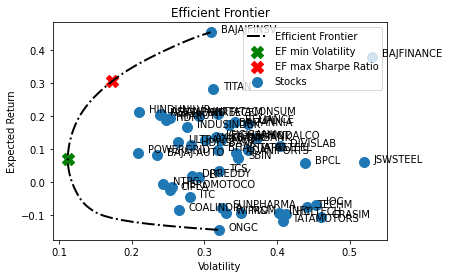

In [56]:
pf.ef_plot_efrontier()
pf.ef_plot_optimal_portfolios()
pf.plot_stocks()

## 2.4 Minimum Risk Portfolio (Unconstrained)
Finds the portfolio with the minimum Volatility

In [57]:
pf = build_portfolio(data = data_2)

In [58]:
df = pf.ef_minimum_volatility()
df = df.reset_index().rename({'index':'Name'}, axis=1)

In [59]:
df.round(3).sort_values("Allocation", ascending = False)

,Name,Allocation
34,POWERGRID,0.144
20,HINDUNILVR,0.104
31,NESTLEIND,0.100
12,DRREDDY,0.069
42,TCS,0.064
47,WIPRO,0.057
32,NTPC,0.057
10,COALINDIA,0.053
25,ITC,0.049
17,HDFCBANK,0.043
